In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import pandas library
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
#creating an empty dataframe for our dataset
df = pd.DataFrame()

In [ ]:
# Read Heart_s.csv dataset from local disk and copy it to df Dataframe
#df=pd.read_csv('./only_labels_simple.csv')
df=pd.read_csv('gdrive/My Drive/Risk Prediction/Balanced_dataset.csv')
#df2=pd.read_csv('./only_labels_simple -test.csv',encoding="ISO-8859–1")


In [ ]:
df.groupby('outcome').size()


outcome
died         6010
recovered    6010
dtype: int64

In [ ]:

df=df.replace('died',0)
df=df.replace('recovered',1)
df=df.replace('stable',1)
df=df.replace('severe',0)
df['chronic_disease'].fillna(0,inplace = True)
df1=df
df2=df

In [ ]:
#creating a list of numerical feature names

num_feat=['age', 'sex', 'anorexia', 'chronic_disease_binary','chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']


In [ ]:
df.corr()

,age,sex,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,chronic_disease_cardiac,chronic_disease_prostate,chronic_disease_cancer,chronic_disease_TB,chronic_disease_Hepatitis,chronic_disease_HIV,chronic_disease_cereberal,chronic_disease_Parkinson,chronic_disease_bronchitis,chronic_disease_hypothyroidism,chronic_disease_dyslipidemia,anorexia,chest pain,chills,conjunctivitis,cough,diarrhea,dizziness,dyspnea,emesis,expectoration,eye irritation,fatigue,fever,gasp,headache,kidney failure,lesions on chest radiographs,hypertension,Myalgia,obnubilation,pneumonia,myelofibrosis,respiratory distress,rhinorrhea,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
age,1.000000,0.049554,0.193957,0.167183,0.116855,0.080140,0.071872,0.061443,0.018021,0.046747,0.053759,3.253826e-02,0.026688,0.021084,0.011192,0.039393,0.037745,0.037727,0.031776,1.431624e-02,-0.001823,-0.003412,-0.003159,-0.001289,-0.002414,-0.002233,-0.001289,-0.003159,0.036260,0.024729,-0.001289,-1.653140e-03,-0.003207,-0.003159,-0.003869,-0.003647,-0.001823,-0.001823,-0.003647,-0.001289,-0.009139,-0.001289,-0.009052,-0.007572,-0.002883,-0.001289,-0.004235,-0.002233,-0.005624,-0.002812,-0.002233,-0.001823,-0.001823,1.264008e-01
sex,0.049554,1.000000,0.031708,0.018917,0.024827,0.012495,0.001556,0.014353,0.000452,0.012216,0.018004,1.138515e-02,0.008050,0.011385,-0.014617,-0.002285,-0.014617,0.013944,-0.007287,1.138515e-02,-0.001616,0.000452,0.012216,0.008050,-0.000231,0.003329,0.008050,0.004708,0.008050,-0.001616,0.008050,6.405785e-03,-0.010104,0.019723,-0.006494,0.003269,-0.001616,-0.001616,-0.009735,0.008050,-0.010628,-0.010335,-0.011361,-0.003615,0.001556,0.008050,-0.016303,-0.007287,-0.007095,-0.001571,0.003329,-0.001616,-0.001616,1.141967e-01
chronic_disease_binary,0.193957,0.031708,1.000000,0.800582,0.595078,0.371812,0.195856,0.231760,0.231760,0.214559,0.195856,1.238549e-01,0.087575,0.123855,0.061256,0.175172,0.123855,0.151697,0.151697,1.238549e-01,-0.001344,-0.002514,-0.002328,-0.000950,0.003187,-0.001646,-0.000950,-0.002328,-0.000950,-0.001344,-0.000950,-4.460079e-03,0.000018,-0.002328,-0.002851,-0.002688,-0.001344,-0.001344,-0.002688,-0.000950,-0.007914,-0.000950,-0.007500,-0.003005,-0.002125,-0.000950,-0.003682,-0.001646,-0.004144,-0.003427,-0.001646,-0.001344,-0.001344,8.962289e-02
chronic_disease_Hypertension,0.167183,0.018917,0.800582,1.000000,0.515510,0.360504,-0.001701,0.206203,0.122916,0.178048,0.047568,7.681520e-02,0.109389,-0.001076,-0.001076,0.163724,0.076815,-0.001318,0.125883,1.547061e-01,-0.001076,-0.002013,-0.001863,-0.000761,0.007399,-0.001318,-0.000761,-0.001863,-0.000761,-0.001076,-0.000761,-3.570659e-03,0.004103,-0.001863,-0.002283,-0.002152,-0.001076,-0.001076,-0.002152,-0.000761,-0.006336,-0.000761,-0.006004,-0.002406,-0.001701,-0.000761,-0.002948,-0.001318,-0.003318,-0.002744,-0.001318,-0.001076,-0.001076,7.735779e-02
chronic_disease_Diabetes,0.116855,0.024827,0.595078,0.515510,1.000000,0.171826,0.064814,0.221908,0.110206,0.179585,0.064814,1.036664e-01,-0.000565,0.208132,-0.000800,0.072744,-0.000800,-0.000979,-0.000979,2.081324e-01,-0.000800,-0.001496,-0.001385,-0.000565,-0.004605,-0.000979,-0.000565,-0.001385,-0.000565,-0.000800,-0.000565,-2.654093e-03,-0.005473,-0.001385,-0.001697,-0.001600,-0.000800,-0.000800,-0.001600,-0.000565,-0.004710,-0.000565,-0.004463,-0.001788,-0.001264,-0.000565,-0.002191,-0.000979,-0.002466,-0.002039,-0.000979,-0.000800,-0.000800,5.928627e-02
chronic_disease_kidney,0.080140,0.012495,0.371812,0.360504,0.171826,1.000000,-0.000790,0.088245,-0.000935,-0.000865,-0.000790,-4.995838e-04,-0.000353,-0.000500,-0.000500,-0.000707,-0.000500,-0.000612,0.135590,-4.995838e-04,-0.000500,-0.000935,-0.000865,-0.000353,-0.002878,-0.000612,-0.000353,-0.000865,-0.000353,-0.000500,-0.000353,-1.658312e-03,-0.003420,-0.000865,-0.001060,-0.000999,-0.000500,-0.000500,-0.0

In [ ]:
#checking X matrix
numX=df[num_feat]
#numX.head()



In [ ]:

y= df['outcome']



In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(numX, y, test_size=0.2, random_state=2)
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

#X1=X_train1.to_numpy('float64')
#X2=X1.resize((10818,9,6,1))





(9616, 54)
(9616,)
(2404, 54)
(2404,)


In [ ]:
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Conv1D
from keras.layers import MaxPooling1D,MaxPooling2D
from keras.layers import Dense
#from keras.optimizers import Adam
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, Reshape
import os
import zipfile
import tensorflow as tf
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.applications.vgg19 import VGG19
from keras.layers import  MaxPooling1D

import sys
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu', input_shape=(54,1)))
#model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu'))
#model.add(Conv1D(filters=512, kernel_size=3, strides=1, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu'))
#model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2 ,strides=1))
#model.add(Reshape((64,32,3), input_shape=(24,256)))
#model.add(Reshape((11,340,3), input_shape=(11,4,256)))
#model.add(VGG19(include_top=False,weights="imagenet",input_shape=(64,32,3)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 52, 256)           1024      
                                                                 
 conv1d_6 (Conv1D)           (None, 50, 256)           196864    
                                                                 
 conv1d_7 (Conv1D)           (None, 48, 256)           196864    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 47, 256)          0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12032)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                770112    
                                                      

In [ ]:
#Optimizer and fit function
from tensorflow.keras.optimizers import RMSprop, Adamax
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adam, Adamax, Adadelta
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from keras.optimizers import 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler


#opt=Adam(0.00001)
#opt =Nadam (0.00001)
#opt =SGD (0.00007)
#opt =RMSprop(0.00001)
#opt =Adadelta (0.000031)
#opt =Adagrad(0.00001)
#opt =Adamax (0.00001)
#opt = Adam(lr=0.0009)  #adam = Adam(lr=0.0001), momentum=0.9 
opt=Adam(learning_rate= 0.0001)  
#opt = keras.optimizers.Adam(learning_rate=0.07)
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt=SGD(learning_rate=0.00087, momentum=0.9)

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='Precision'),
      keras.metrics.Recall(name='Recall'),
      keras.metrics.AUC(name='Auc'),
      
]
model.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics='accuracy')

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.ticker as ticker 
import seaborn as sns
# matrix = metrics.confusion_matrix(testy,yhat_classes)
from sklearn import metrics 
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.datasets import make_circles

kfold = KFold(n_splits=10, shuffle=False)

#for train_index, test_index in kfold.split(df):
    #print(train_index, test_index)

# to get the values from our data, we use np.take() to access a value at particular index
#for train_index, test_index in kfold.split(df):
    #print(np.take(df,train_index), np.take(df,test_index))
j=1           
i = 1
for train_index, test_index in kfold.split(df):
    X4 = df.iloc[train_index].loc[:, num_feat]
    X5 = df.iloc[test_index][num_feat]
    y4= df.iloc[train_index].loc[:,'outcome']
    y5 = df.loc[test_index]['outcome']
    #print(X4.shape)
    #print(X5.shape)
    #print(y4.shape)

    X6= X4.to_numpy('float64')
    #print(X6.size)
    X7=np.resize(X6,(10818,54,1))   #train data
    #print(X7.size)
    X8= X5.to_numpy('float64')
    X9=np.resize(X8,(1202,54,1))   #validation data  
    y6=y4.to_numpy('int')    #train output
    y7=y5.to_numpy('int')    #validation output
    train_x = X7
    train_y = y6
    validation_x = X9
    validation_y = y7
    #Train the model
    history= model.fit(train_x , train_y, epochs=100, batch_size=16,verbose=1) #Training the model
    ypre=model.predict(validation_x)
    #print(type(validation_y))
    #print(type(ypre))
    pre_y=np.round(abs(ypre))
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(validation_y, pre_y )}")
    model.save('gdrive/My Drive/risk results1/RP9lstm_'+str(j)+'.h5')
    #print(cross_val_score(model, validation_y, pre_y,  scoring="f1", cv = kfold))
    accuracy = accuracy_score(validation_y, pre_y)
    print('Accuracy: %f' % accuracy)
    # confusion matrix
    matrix = confusion_matrix(validation_y, pre_y)
    print(matrix)
    ax=ax_+str(j)
    ax=plt.subplot()
    sns.heatmap(matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
    ax.set_xlabel('Predicted labels'); 
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Died', 'recovered']); 
    ax.yaxis.set_ticklabels(['Died', 'recovered']);
    ax.set(yticks=[0, 2], xticks=[0.5, 1.5])
    ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))
    i += 1 
    j=j+1 

      


        
      

#Save and serialize
model.save('gdrive/My Drive/risk_predixtion_99.h5')
print('model saved!!!!!')


Epoch 1/100
677/677 [==============================] - 9s 10ms/step - loss: 0.3728 - accuracy: 0.8714
Epoch 2/100
677/677 [==============================] - 6s 9ms/step - loss: 0.3751 - accuracy: 0.8719
Epoch 3/100
677/677 [==============================] - 6s 9ms/step - loss: 0.3782 - accuracy: 0.8691
Epoch 4/100
677/677 [==============================] - 6s 10ms/step - loss: 0.3759 - accuracy: 0.8698
Epoch 5/100
677/677 [==============================] - 6s 9ms/step - loss: 0.3796 - accuracy: 0.8690
Epoch 6/100
677/677 [==============================] - 6s 9ms/step - loss: 0.3751 - accuracy: 0.8725
Epoch 7/100
677/677 [==============================] - 6s 9ms/step - loss: 0.3759 - accuracy: 0.8705
Epoch 8/100
677/677 [==============================] - 6s 9ms/step - loss: 0.3716 - accuracy: 0.8707
Epoch 9/100
677/677 [==============================] - 6s 9ms/step - loss: 0.3745 - accuracy: 0.8712
Epoch 10/100
677/677 [==============================] - 6s 9ms/step - loss: 0.3774 - accu

NameError: ignored

In [ ]:
#import Keras
from keras.models import load_model
model = load_model('gdrive/My Drive/risk_predixtion_66.h5')

Accuracy: 0.860649
Classification Report
              precision    recall  f1-score   support

   Recovered       0.81      0.94      0.87      1209
        Died       0.93      0.78      0.85      1195

    accuracy                           0.86      2404
   macro avg       0.87      0.86      0.86      2404
weighted avg       0.87      0.86      0.86      2404

[[1137   72]
 [ 263  932]]


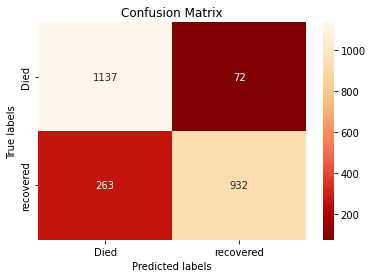

In [ ]:
from keras.models import load_model
from sklearn.metrics import classification_report

model = load_model('gdrive/My Drive/risk results1/RP6_7.h5')
import matplotlib.ticker as ticker 
import seaborn as sns
# matrix = metrics.confusion_matrix(testy,yhat_classes)
from sklearn import metrics 
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.datasets import make_circles
X_test2=np.resize(X_test1,(2404,54,1))   #validation data  
y_test2=y_test1.to_numpy('int')    #train output
validation_x = X_test2
validation_y = y_test2
ypre=model.predict(validation_x)
pre_y=np.where(ypre>0.5, 1, 0)
accuracy = accuracy_score(validation_y, pre_y)
print('Accuracy: %f' % accuracy)
print('Classification Report')
target_names = ['Recovered', 'Died']
print(classification_report(validation_y, pre_y, target_names=target_names))
# confusion matrix
matrix = confusion_matrix(validation_y, pre_y)
print(matrix)
ax=plt.subplot()
sns.heatmap(matrix,annot=True,ax=ax,cmap='OrRd_r', fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Died', 'recovered']); 
ax.yaxis.set_ticklabels(['Died', 'recovered']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

In [ ]:
#LSTM-CNN code
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Conv1D
from keras.layers import MaxPooling2D
from keras.layers import Dense
#from keras.optimizers import SGD, Adam
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, Reshape
import os
import zipfile
import tensorflow as tf
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import sys
from keras.layers import TimeDistributed
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model
from keras import regularizers
from keras.layers import Dense, Dropout, Flatten,Activation 
from keras.layers import AveragePooling2D, Input, Flatten
import numpy as np
from tensorflow import keras
from keras.layers import InputLayer
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#from keras.optimizers import SGD, Adam
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def crate_Model(): #LSTM-CNN code model for Pneumnia deep learning detection
    model = Sequential()
    model.add(BatchNormalization(input_shape=(54,1)))
    model.add(Reshape((9,6,1), input_shape=(54,1)))
    print("shape is {}".format(model.output_shape))
    model.add(TimeDistributed(LSTM(256, activation='tanh',return_sequences = True)))
    model.add(Dropout(0.6))
    model.add(BatchNormalization())
    model.add(TimeDistributed(Conv1D(256, kernel_size=4, activation='relu',
                                     padding="same",
                                     kernel_regularizer=regularizers.l2(0.01), 
                                     bias_regularizer=regularizers.l2(0.01))))
    model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu'))
    model.add(AveragePooling2D((2,2)))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    print(model.summary())
    #model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=METRICS)
  
    return model
model=crate_Model()

#model1.summary()



shape is (None, 9, 6, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 54, 1)            4         
 hNormalization)                                                 
                                                                 
 reshape (Reshape)           (None, 9, 6, 1)           0         
                                                                 
 time_distributed (TimeDistr  (None, 9, 6, 256)        264192    
 ibuted)                                                         
                                                                 
 dropout_2 (Dropout)         (None, 9, 6, 256)         0         
                                                                 
 batch_normalization_3 (Batc  (None, 9, 6, 256)        1024      
 hNormalization)                                                 
                             

In [ ]:
#load and preprocessing the augmanted images
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import image_dataset_from_directory 
import os
import zipfile
# Directory with our training pictures
train_risk_covid = os.path.join('gdrive/My Drive/Risk Prediction/train/Test Risk COVID/')
#train_risk_covid = os.path.join('gdrive/My Drive/Risk Prediction/train/train/')


from tensorflow.keras.preprocessing.image import ImageDataGenerator

#crate the image generator to (resize, normalize, filter and augmantation) images
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      validation_split=0.2,
      fill_mode='nearest')


# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_risk_covid ,  # This is the source directory for training images
       target_size=(224, 224),  # All images will be resized to 224x224
       batch_size=32,
        subset='training',
        shuffle=False,
        # Since we use categorical_crossentropy loss, 
        class_mode='binary')

# Flow validation images in batches of 64 using validation_datagen generator
validation_generator = train_datagen.flow_from_directory(
        train_risk_covid , # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        shuffle=False,
        subset='validation',
        # Since we use categorical_crossentropy loss, 
        class_mode='binary')




Found 362 images belonging to 2 classes.
Found 1448 images belonging to 2 classes.


In [ ]:
#CNN model 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from tensorflow.keras import initializers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation



model = Sequential() #CNN code model for Pneumnia deep learning detection
model.add(Conv2D(256, (3, 3), input_shape=(224, 224, 3),padding="same", 
                 kernel_initializer='random_normal',bias_initializer='zeros', 
                 kernel_regularizer=regularizers.l2(0.02), 
                 bias_regularizer=regularizers.l2(0.02)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3),padding="same", kernel_initializer='random_normal',
                 bias_initializer='zeros', 
                 kernel_regularizer=regularizers.l2(0.02), 
                 bias_regularizer=regularizers.l2(0.02)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3),strides=(3,3)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2),strides=(3,3)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model=model

model.summary()

# CNN Model
 
#from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation # core layers1
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adamax
import tensorflow as tf
from tensorflow import keras
 
import os
import tempfile
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adam
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import regularizers

classes_no=8

#MobileNetV2 using trained weights model
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
#from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
#from keras.layers.normalization import BatchNormalization
#from keras.applications import ResNet152V2,MobileNetV2
import os
import tensorflow as tf
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import tensorflow as tf
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
#from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
#from keras.optimizers import SGD, Adam, RMSprop 
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation,Reshape # core layers1
#from keras.layers.normalization import BatchNormalization
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

#opt=Adam(0.00001)
#opt =Nadam (0.00001)
#opt =SGD (0.00007)
#opt =RMSprop(0.00001)
#opt =Adadelta (0.000031)
#opt =Adagrad(0.00001)
#opt =Adamax (0.00001)
#opt = Adam(lr=0.0009)  #adam = Adam(lr=0.0001), momentum=0.9 
opt=Adam(learning_rate= 0.0001)  
#opt = keras.optimizers.Adam(learning_rate=0.07)
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt=SGD(learning_rate=0.00087, momentum=0.9)

#opt = RMSprop(learning_rate=0.001) 
#opt = SGD(lr= 0.00006, momentum=0.9)    
#opt = Adamax(lr= 0.000009, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]
   
model.compile(loss='binary_crossentropy', optimizer= opt, metrics=[METRICS])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 256)     7168      
                                                                 
 activation (Activation)     (None, 224, 224, 256)     0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 256)    1024      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     295040    
                                                                 
 activation_1 (Activation)   (None, 224, 224, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                      